## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Load data

In [2]:
sales=pd.read_pickle('intermed/sales_level_1.sav')
holidays=pd.read_pickle('intermed/holidays.sav')
sales_df=pd.merge(sales, holidays, how='left', left_on=['transaction_date'], right_on=['Date']).drop('Date',axis=1)
sales_df.head()

,DATE_ISO,total_amt,transaction_date,blackFriday2013,blackFriday2012,blackFriday2011,event_value,isMonthEnd,isMonthStart,Weekend_FLG,quarter,month,year,dayofweek,dayofyear,dayofmonth,weekofyear,week_index,seasonal_week_index,Is_holidays
0,20110125,48957.025,2011-01-25,6,6,6,6,0,0,0,1,1,2011,1,25,25,4,0,4,0
1,20110126,62045.750,2011-01-26,6,6,6,6,0,0,0,1,1,2011,2,26,26,4,0,4,0
2,20110127,30886.960,2011-01-27,6,6,6,6,0,0,0,1,1,2011,3,27,27,4,0,4,0
3,20110128,39730.275,2011-01-28,6,6,6,6,0,0,0,1,1,2011,4,28,28,4,0,4,0
4,20110129,42027.570,2011-01-29,6,6,6,6,0,0,1,1,1,2011,5,29,29,4,0,4,0


## Rolling Window Feature

In [3]:
lag_features = ['total_amt']
window1 = 3
window2 = 7
window3 = 10
df_rolled_3d = sales_df[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = sales_df[lag_features].rolling(window=window2, min_periods=0)
df_rolled_10d = sales_df[lag_features].rolling(window=window3, min_periods=0)



df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index().astype(np.float32)
df_mean_10d = df_rolled_10d.mean().shift(1).reset_index().astype(np.float32)

df_std_3d = df_rolled_3d.std().shift(1).reset_index().astype(np.float32)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)
df_std_10d = df_rolled_10d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
    sales_df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    sales_df[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    sales_df[f"{feature}_mean_lag{window3}"] = df_mean_10d[feature]
    
    sales_df[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    sales_df[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    sales_df[f"{feature}_std_lag{window3}"] = df_std_10d[feature]


sales_df.head()

,DATE_ISO,total_amt,transaction_date,blackFriday2013,blackFriday2012,blackFriday2011,event_value,isMonthEnd,isMonthStart,Weekend_FLG,...,weekofyear,week_index,seasonal_week_index,Is_holidays,total_amt_mean_lag3,total_amt_mean_lag7,total_amt_mean_lag10,total_amt_std_lag3,total_amt_std_lag7,total_amt_std_lag10
0,20110125,48957.025,2011-01-25,6,6,6,6,0,0,0,...,4,0,4,0,NaN,NaN,NaN,NaN,NaN,NaN
1,20110126,62045.750,2011-01-26,6,6,6,6,0,0,0,...,4,0,4,0,48957.023438,48957.023438,48957.023438,NaN,NaN,NaN
2,20110127,30886.960,2011-01-27,6,6,6,6,0,0,0,...,4,0,4,0,55501.386719,55501.386719,55501.386719,9255.125977,9255.125977,9255.125977
3,20110128,39730.275,2011-01-28,6,6,6,6,0,0,0,...,4,0,4,0,47296.578125,47296.578125,47296.578125,15645.618164,15645.618164,15645.618164
4,20110129,42027.570,2011-01-29,6,6,6,6,0,0,1,...,4,0,4,0,44220.996094,45405.003906,45405.003906,16057.473633,13323.005859,13323.005859


## Lag Features

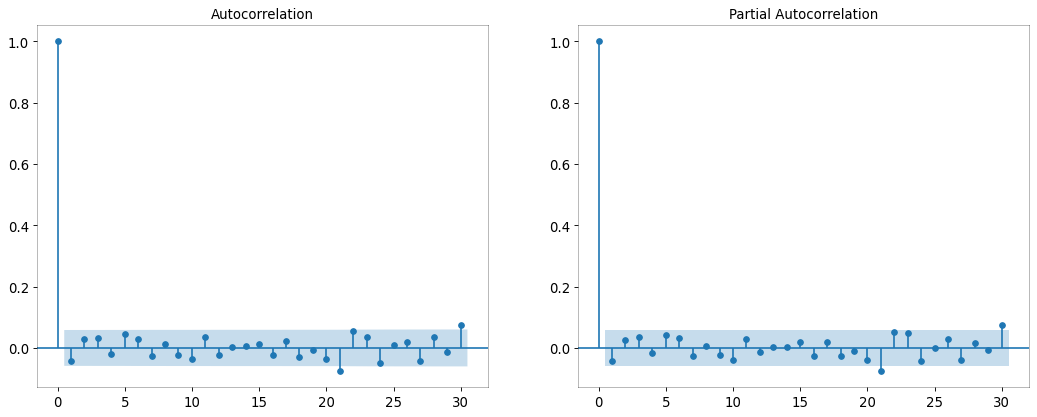

In [4]:
import pandas as pd
# Draw Plot
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6), dpi= 80)
plot_acf(sales_df.total_amt.tolist(), ax=ax1, lags=30)
plot_pacf(sales_df.total_amt.tolist(), ax=ax2, lags=30)

# Mise en forme
# Ajuster les bordures
ax1.spines["top"].set_alpha(.3); ax2.spines["top"].set_alpha(.3)
ax1.spines["bottom"].set_alpha(.3); ax2.spines["bottom"].set_alpha(.3)
ax1.spines["right"].set_alpha(.3); ax2.spines["right"].set_alpha(.3)
ax1.spines["left"].set_alpha(.3); ax2.spines["left"].set_alpha(.3)

# font size
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()

The PACF shows a low correlation with the first lag and the second. Same for other order===> we don't need lag features
the ACF shows a slow decay, which means that the future values have a very low correlation with its past values
So, statistically speaking , the serie total_amt is stationary process.

In [5]:
sales_df.fillna(sales_df.mean(numeric_only=True), inplace=True)

## Weather data

In [6]:
weather=pd.read_pickle(r'C:\Users\u32118508\OneDrive - UPEC\Telechargement\Advance Analytics\data_acquisition\data_acquisition\weather\france_weather.sav')

In [7]:
weather_filter=weather.groupby('YEAR_MONTH_DAY').mean().reset_index()

weather_filter = weather_filter.groupby(weather_filter.columns, axis = 1).transform(lambda x: x.fillna(x.mean()))

weather_filter

,YEAR_MONTH_DAY,PRCP,SNWD,TAVG,TMAX,TMIN,LATITUDE,LONGITUDE
0,20110101,1.135135,46.333333,34.109589,60.560606,13.431034,46.382053,3.490561
1,20110102,1.800000,53.333333,30.767123,59.855072,6.642857,46.382053,3.490561
2,20110103,3.546667,46.000000,12.315068,38.589041,-15.303030,46.382053,3.490561
3,20110104,2.893333,36.666667,10.561644,38.600000,-13.483333,46.382053,3.490561
4,20110105,26.946667,30.000000,36.301370,93.471698,-11.026667,46.382053,3.490561
...,...,...,...,...,...,...,...,...
1456,20141227,63.454545,10.000000,56.276316,86.597015,25.482759,46.403744,3.477075
1457,20141228,39.311688,13.636364,18.578947,46.800000,4.460000,46.403744,3.477075
1458,20141229,1.792208,17.285714,0.197368,44.406250,-45.647887,46.403744,3.477075
1459,20141230,1.909091,18.500000,15.842105,55.202899,-19.318841,46.403744,3.477075


In [8]:
sales_df.DATE_ISO=sales_df.DATE_ISO.astype(int)
sales_full=pd.merge(sales_df, weather_filter, how='left', left_on=['DATE_ISO'], right_on=['YEAR_MONTH_DAY'] ).drop(['SNWD','YEAR_MONTH_DAY','LATITUDE','LONGITUDE'],axis=1)
sales_full.head()

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

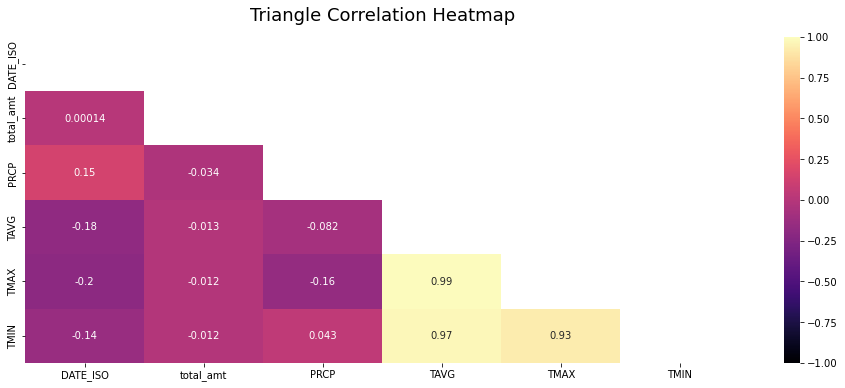

In [9]:
plt.figure(figsize=(16, 6))
import seaborn as sns
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(sales_full[['DATE_ISO','total_amt','PRCP','TAVG','TMAX','TMIN']].corr()))
heatmap = sns.heatmap(sales_full[['DATE_ISO','total_amt','PRCP','TAVG','TMAX','TMIN']].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='magma')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

Il semble que des corrélations linéaires ne semblent pas exister dans ce cas. Neanmois cela n'exclus d'autres types de correlations.

In [10]:
plt.rcParams['figure.figsize'] = 20, 4

<AxesSubplot:>

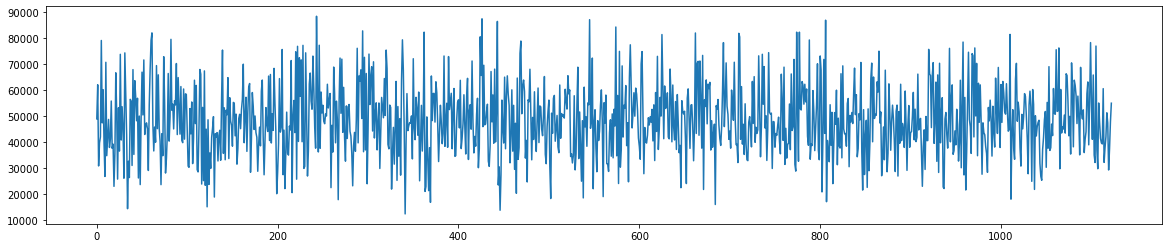

In [11]:
sales_full.total_amt.plot()

<AxesSubplot:>

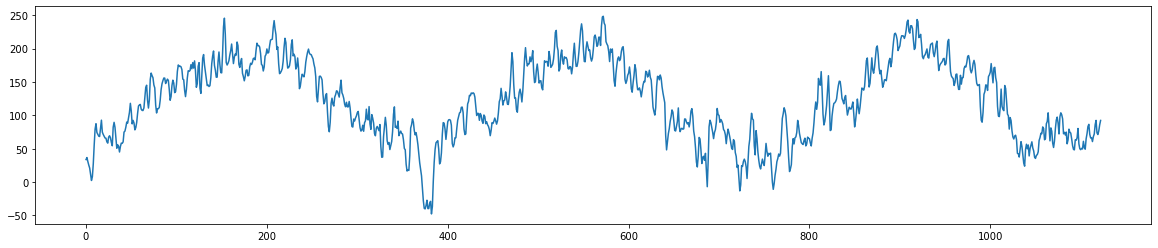

In [13]:
sales_full.TAVG.plot()

Je soupçonne la présence de rélation inverse pour les pics observés.

In [14]:
sales_full.to_pickle('intermed/sales_full.sav')